<a href="https://colab.research.google.com/github/cgree136/D3/blob/Homework3/Homework3(Cancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Logistic Regression Model (Without Weight Penalty) Results:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


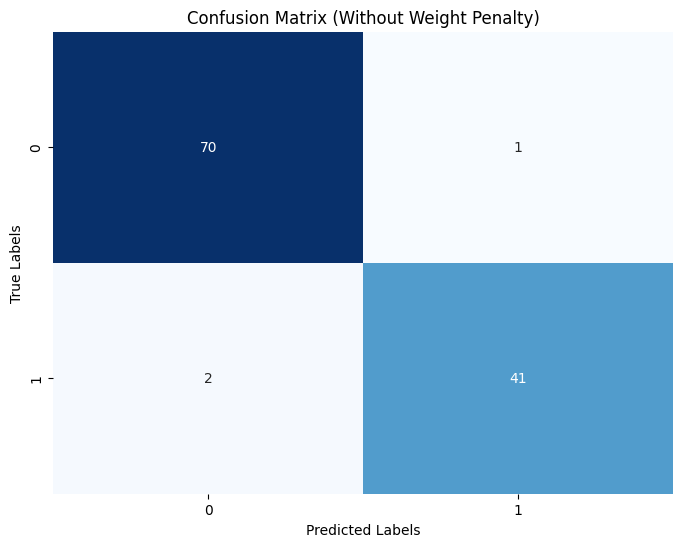


Logistic Regression Model With Weight Penalty Results:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


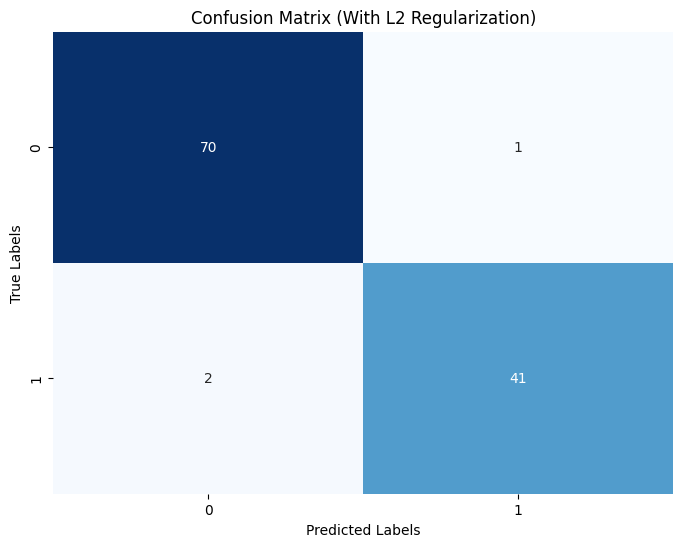

In [4]:
#PROBELM 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from google.colab import drive
drive.mount('/content/drive')

path ="/content/drive/MyDrive/cancer.csv"
data = pd.read_csv(path)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into input (X) and the target output (y)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# a. Train a logistic regression model without weight penalty
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Logistic Regression Model (Without Weight Penalty) Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix with a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Without Weight Penalty)')
plt.show()

# b. Train a logistic regression model with weight penalty
lr_model_regularized = LogisticRegression(penalty='l2')
lr_model_regularized.fit(X_train, y_train)

# Evaluate the regularized model
y_pred_regularized = lr_model_regularized.predict(X_test)

# Calculate metrics
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
precision_regularized = precision_score(y_test, y_pred_regularized)
recall_regularized = recall_score(y_test, y_pred_regularized)
f1_regularized = f1_score(y_test, y_pred_regularized)

# Print the results
print("\nLogistic Regression Model With Weight Penalty Results:")
print("Accuracy:", accuracy_regularized)
print("Precision:", precision_regularized)
print("Recall:", recall_regularized)
print("F1 Score:", f1_regularized)

# Plot confusion matrix with a heatmap for the Weight penalty  model
conf_matrix_regularized = confusion_matrix(y_test, y_pred_regularized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_regularized, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (With L2 Regularization)')
plt.show()


In [5]:
#PROBLEM 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from google.colab import drive
drive.mount('/content/drive')

path ="/content/drive/MyDrive/cancer.csv"
data = pd.read_csv(path)

# Convert 'diagnosis' column to binary labels (Malignant=1, Benign=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into features (X) and the target variable (y)
X = data.drop(['id', 'diagnosis'], axis=1)  # Exclude 'id' and 'diagnosis' columns from features
y = data['diagnosis']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train a Naive Bayes classifier (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Report Results
print("Naive Bayes Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Naive Bayes Classifier Results:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9302325581395349
F1 Score: 0.963855421686747


In [13]:
#PROBLEM 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

path ="/content/drive/MyDrive/cancer.csv"
data = pd.read_csv(path)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into features (X) and the target variable (y)
X = data.drop(['id', 'diagnosis'], axis=1)  # Exclude 'id' and 'diagnosis' columns from features
y = data['diagnosis']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a range of K values (number of principal components)
k_values = range(1, 20)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    # Apply PCA with K components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a logistic regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = lr_model.predict(X_test_pca)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find the index of K with the highest accuracy
best_k_index = np.argmax(accuracy_scores)
best_k = k_values[best_k_index]

# Report the results for the best K
print(f"Best K: {best_k}")
print(f"Accuracy: {accuracy_scores[best_k_index]}")
print(f"Precision: {precision_scores[best_k_index]}")
print(f"Recall: {recall_scores[best_k_index]}")
print(f"F1 Score: {f1_scores[best_k_index]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best K: 2
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9767441860465116
F1 Score: 0.988235294117647


In [12]:
#PROBLEM 5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from google.colab import drive
drive.mount('/content/drive')

path ="/content/drive/MyDrive/cancer.csv"
data = pd.read_csv(path)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into features (X) and the target variable (y)
X = data.drop(['id', 'diagnosis'], axis=1)  # Exclude 'id' and 'diagnosis' columns from features
y = data['diagnosis']


# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a range of K values (number of principal components)
k_values = range(1, 20)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform PCA for different values of K
for K in range(1, min(X_train.shape[0], X_train.shape[1]) + 1):
    # Apply PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a Gaussian Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train_pca, y_train)

    # Evaluate the model
    y_pred = nb_model.predict(X_test_pca)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find the index of K with the highest accuracy
best_k_index = np.argmax(accuracy_scores)
best_k = k_values[best_k_index]

# Report the results for the best K
print(f"Best K: {best_k}")
print(f"Accuracy: {accuracy_scores[best_k_index]}")
print(f"Precision: {precision_scores[best_k_index]}")
print(f"Recall: {recall_scores[best_k_index]}")
print(f"F1 Score: {f1_scores[best_k_index]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best K: 2
Accuracy: 0.9473684210526315
Precision: 0.9743589743589743
Recall: 0.8837209302325582
F1 Score: 0.9268292682926831
